In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
theta = np.linspace(0, 2 * np.pi, 150)
radius = 55
SAT_len = 22
SAT_plane = 2

In [3]:
SATs = np.zeros((SAT_len*SAT_plane, 3, 150))
for i in range(SAT_len):
    SATs[i,0,:] = 65*i + radius * np.cos(theta)
    SATs[i,1,:] =  10  + radius * np.sin(theta)

    SATs[i + SAT_len,0,:] = -25 + 65*i + radius * np.cos(theta)
    SATs[i + SAT_len,1,:] =  10 +   65 + radius * np.sin(theta)

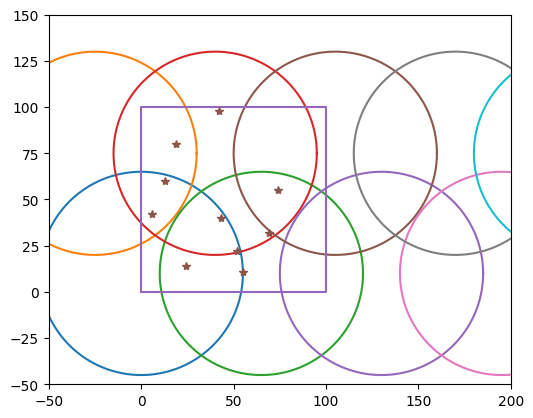

In [4]:
rect = [[0,0], [100,0], [0,100], [100,100]]

GS_size = 10
GSs = np.zeros((GS_size, 3))

for i in range(GS_size):
    GSs[i][0] = np.random.randint(0,100 + 1)
    GSs[i][1] = np.random.randint(0,100 + 1)

figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])

plt.show()

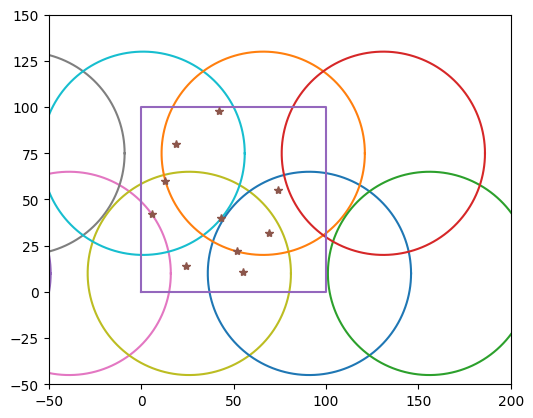

In [5]:
def SAT_location(SAT, SAT_len, time, speed, radius, theta):
    for i in range(SAT_len):
        SAT[i,0,:] = 65*i -speed * time + radius * np.cos(theta)
        SAT[i,1,:] =  10                + radius * np.sin(theta)

        SAT[i + SAT_len,0,:] = -25 + 65*i -speed * time + radius * np.cos(theta)
        SAT[i + SAT_len,1,:] =  10 +   65               + radius * np.sin(theta)
    
    return SAT

SATs = SAT_location(SATs, SAT_len=SAT_len, time=155, speed=7.8, radius=radius, theta=theta)

figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])

plt.show()

In [6]:
SAT_coord = np.zeros((SAT_len*2,3))

def SAT_location_(SAT, SAT_len, time, speed):
    for i in range(SAT_len):
        SAT[i,0] = 65*i -speed * time
        SAT[i,1] = 10

        SAT[i+SAT_len,0] = -25 + 65*i -speed * time
        SAT[i+SAT_len,1] =  10 + 65
    
    return SAT

SAT_coord = SAT_location_(SAT_coord, SAT_len=SAT_len, time=155, speed=7.8)

GS = GSs[:,0:2]
SAT = SAT_coord[:,0:2]

In [7]:
dist = np.zeros((GS_size, SAT_len*2))

for i in range(GS_size):
    for j in range(SAT_len*2):
        dist[i][j] = np.linalg.norm(GS[i] - SAT[j])

print(dist)

[[1233.00648822 1168.00684929 1103.00725292 1038.0077071   973.00822196
   908.00881053  843.00948986  778.01028271  713.01122011  648.01234556
   583.01372197  518.01544379  453.0176597   388.02061801  323.02476685
   258.03100589  193.04144633  128.06248475   63.12685641    4.47213595
    67.11929678  132.06059215 1259.4780665  1194.55849585 1129.64817532
  1064.74879667  999.86249055  934.99197858  870.14079321  805.31360351
   740.51671149  675.75883272  611.05237091  546.41559275  481.87654021
   417.48053847  353.30581654  289.49956822  226.37358503  164.71186964
   107.07474025   65.19202405   74.06078585  123.1665539 ]
 [1278.18934435 1213.19948895 1148.21078204 1083.22343032 1018.23769327
   953.25390112  888.27248072  823.29399366  758.31919401  693.34911841
   628.38523216  563.42967618  498.48570692  433.55853123  368.65702218
   303.79763001  239.0146439   174.39323381  110.21796587   48.3011387
    31.11269837   89.73850901 1303.70932343 1238.74654389 1173.78788544
  1108

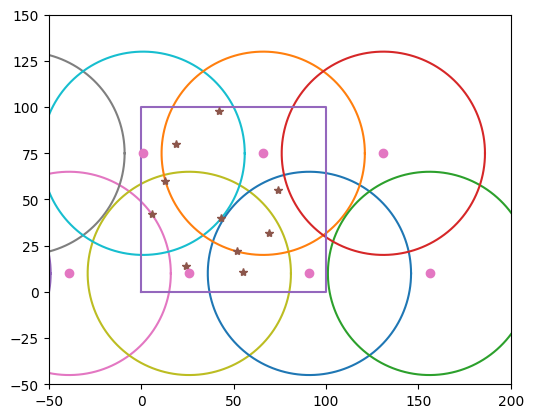

In [8]:
figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])
axes.plot(SAT_coord[:,0], SAT_coord[:,1], 'o')

plt.show()

In [ ]:
#거리 판단 다시

In [9]:
dist = np.zeros((GS_size, SAT_len*2))

for i in range(GS_size):
    for j in range(SAT_len*2):
        dist[i][j] = np.linalg.norm(GS[i] - SAT[j])


coverage_indicator = np.zeros((GS_size, SAT_len*2))
coverage_index = np.where(dist <= radius)
coverage_indicator[coverage_index[:][0], coverage_index[:][1]] = 1
print(coverage_indicator)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [10]:
print(coverage_index)

(array([0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9],
      dtype=int64), array([19, 19, 20, 42, 19, 20, 42, 41, 42, 19, 41, 42, 19, 20, 19, 41, 41,
       42, 19, 41, 20, 42], dtype=int64))


In [11]:
print(GS)

[[24. 14.]
 [69. 32.]
 [52. 22.]
 [42. 98.]
 [43. 40.]
 [55. 11.]
 [ 6. 42.]
 [19. 80.]
 [13. 60.]
 [74. 55.]]


In [27]:
def visible_time(SAT_point, SAT_speed, coverage_radius, GS):
    """
    return visible time btw SAT and GS
    """
    visible_time = (np.sqrt(coverage_radius ** 2 - (GS[1]-SAT_point[1]) ** 2) - GS[0] + SAT_point[0]) / SAT_speed
    visible_time = np.max((visible_time, 0))
    return visible_time

time = visible_time(SAT_coord[0], SAT_speed=7.8, coverage_radius=radius, GS=GS[0])

In [28]:
#time = visible_time(SAT_coord[19], SAT_speed=7.8, coverage_radius=radius, GS=GS[0])
print(time)

0.0
